In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the ICO dataset 
df=pd.read_csv("ICOBench.csv")
df.head()

,Status,ExpertRating,ExpertNumber,Team,Vision,Product,PriceinICO,Tokensforsale,DistributedinICO,Hardcap
0,Ended,3.6,5,3.7,3.9,3.3,0.987,6.420000e+07,97.0,60000.0
1,Ended,3.5,11,3.9,3.4,3.0,0.100,2.120089e+09,65.0,212000000.0
2,Ended,4.5,11,4.3,4.7,4.1,0.100,4.500000e+08,45.0,22000000.0
3,Trading,4.0,5,4.3,4.4,4.2,1.618,2.415782e+07,61.0,NaN
4,Ended,3.3,0,NaN,NaN,NaN,0.120,2.230000e+08,55.0,20000000.0


In [17]:
# Drop Empty rows
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 406
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Status            234 non-null    object  
 1   ExpertRating      234 non-null    category
 2   ExpertNumber      234 non-null    int64   
 3   Team              234 non-null    float64 
 4   Vision            234 non-null    float64 
 5   Product           234 non-null    float64 
 6   PriceinICO        234 non-null    float64 
 7   Tokensforsale     234 non-null    float64 
 8   DistributedinICO  234 non-null    float64 
 9   Hardcap           234 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 19.8+ KB


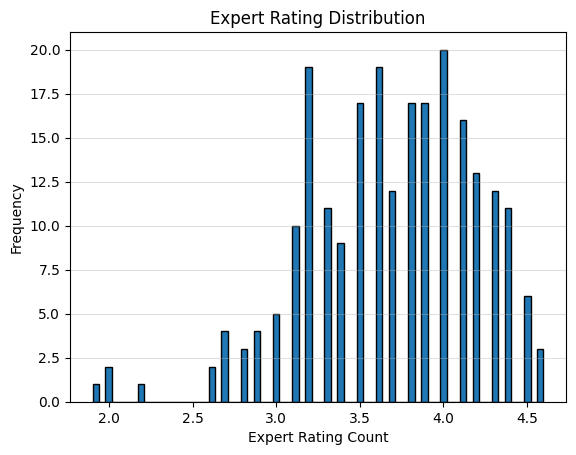

In [19]:
#Histogram of ExpertRating

df['ExpertRating'] = df['ExpertRating'].astype('category')

# Display the distribution of ExpertRating
plt.hist(df['ExpertRating'] , bins=70, edgecolor='black')
plt.title('Expert Rating Distribution')
plt.xlabel('Expert Rating Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.4)
plt.show()

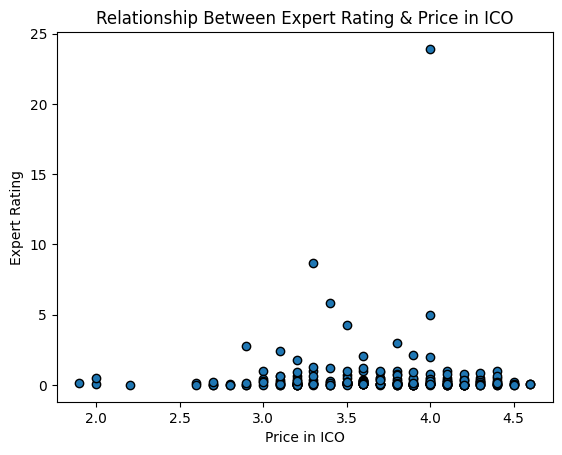

In [33]:
# Display the Relationship Between Expert Rating & Price in ICO

plt.scatter(df['ExpertRating'], df['PriceinICO'], edgecolors='black')
plt.title('Relationship Between Expert Rating & Price in ICO')
plt.xlabel('Price in ICO')
plt.ylabel('Expert Rating')
plt.show()

In [34]:
df['Status'].value_counts()

Ended      185
Trading     49
Name: Status, dtype: int64

In [44]:
df.head()


,Status,ExpertRating,ExpertNumber,Team,Vision,Product,PriceinICO,Tokensforsale,DistributedinICO,Hardcap
0,Ended,3.6,5,3.7,3.9,3.3,0.987,6.420000e+07,97.0,60000.0
1,Ended,3.5,11,3.9,3.4,3.0,0.100,2.120089e+09,65.0,212000000.0
2,Ended,4.5,11,4.3,4.7,4.1,0.100,4.500000e+08,45.0,22000000.0
5,Ended,4.0,1,3.0,2.0,2.0,0.500,8.500000e+07,47.0,48000000.0
7,Ended,4.1,7,4.0,4.2,3.4,0.338,3.600962e+07,43.0,30000000.0


In [45]:
print(df.iloc[:,1:9])

    ExpertRating  ExpertNumber  Team  Vision  Product  PriceinICO  \
0            3.6             5   3.7     3.9      3.3       0.987   
1            3.5            11   3.9     3.4      3.0       0.100   
2            4.5            11   4.3     4.7      4.1       0.100   
5            4.0             1   3.0     2.0      2.0       0.500   
7            4.1             7   4.0     4.2      3.4       0.338   
..           ...           ...   ...     ...      ...         ...   
399          3.6             2   5.0     4.0      3.4       0.043   
401          3.5             2   4.0     4.3      3.3       0.205   
402          3.2             4   3.0     3.3      3.2       0.900   
405          3.7             1   2.0     5.0      3.0       0.350   
406          2.0             6   1.3     1.5      1.5       0.500   

     Tokensforsale  DistributedinICO  
0     6.420000e+07             97.00  
1     2.120089e+09             65.00  
2     4.500000e+08             45.00  
5     8.500000e

In [46]:
X = df.iloc[:,1:9]
y = df.iloc[:, 0]

In [47]:
# Split data into training (80%) and testing (20%) sets, using seed 80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=80,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=80)

In [48]:
print(model.classes_)

['Ended' 'Trading']


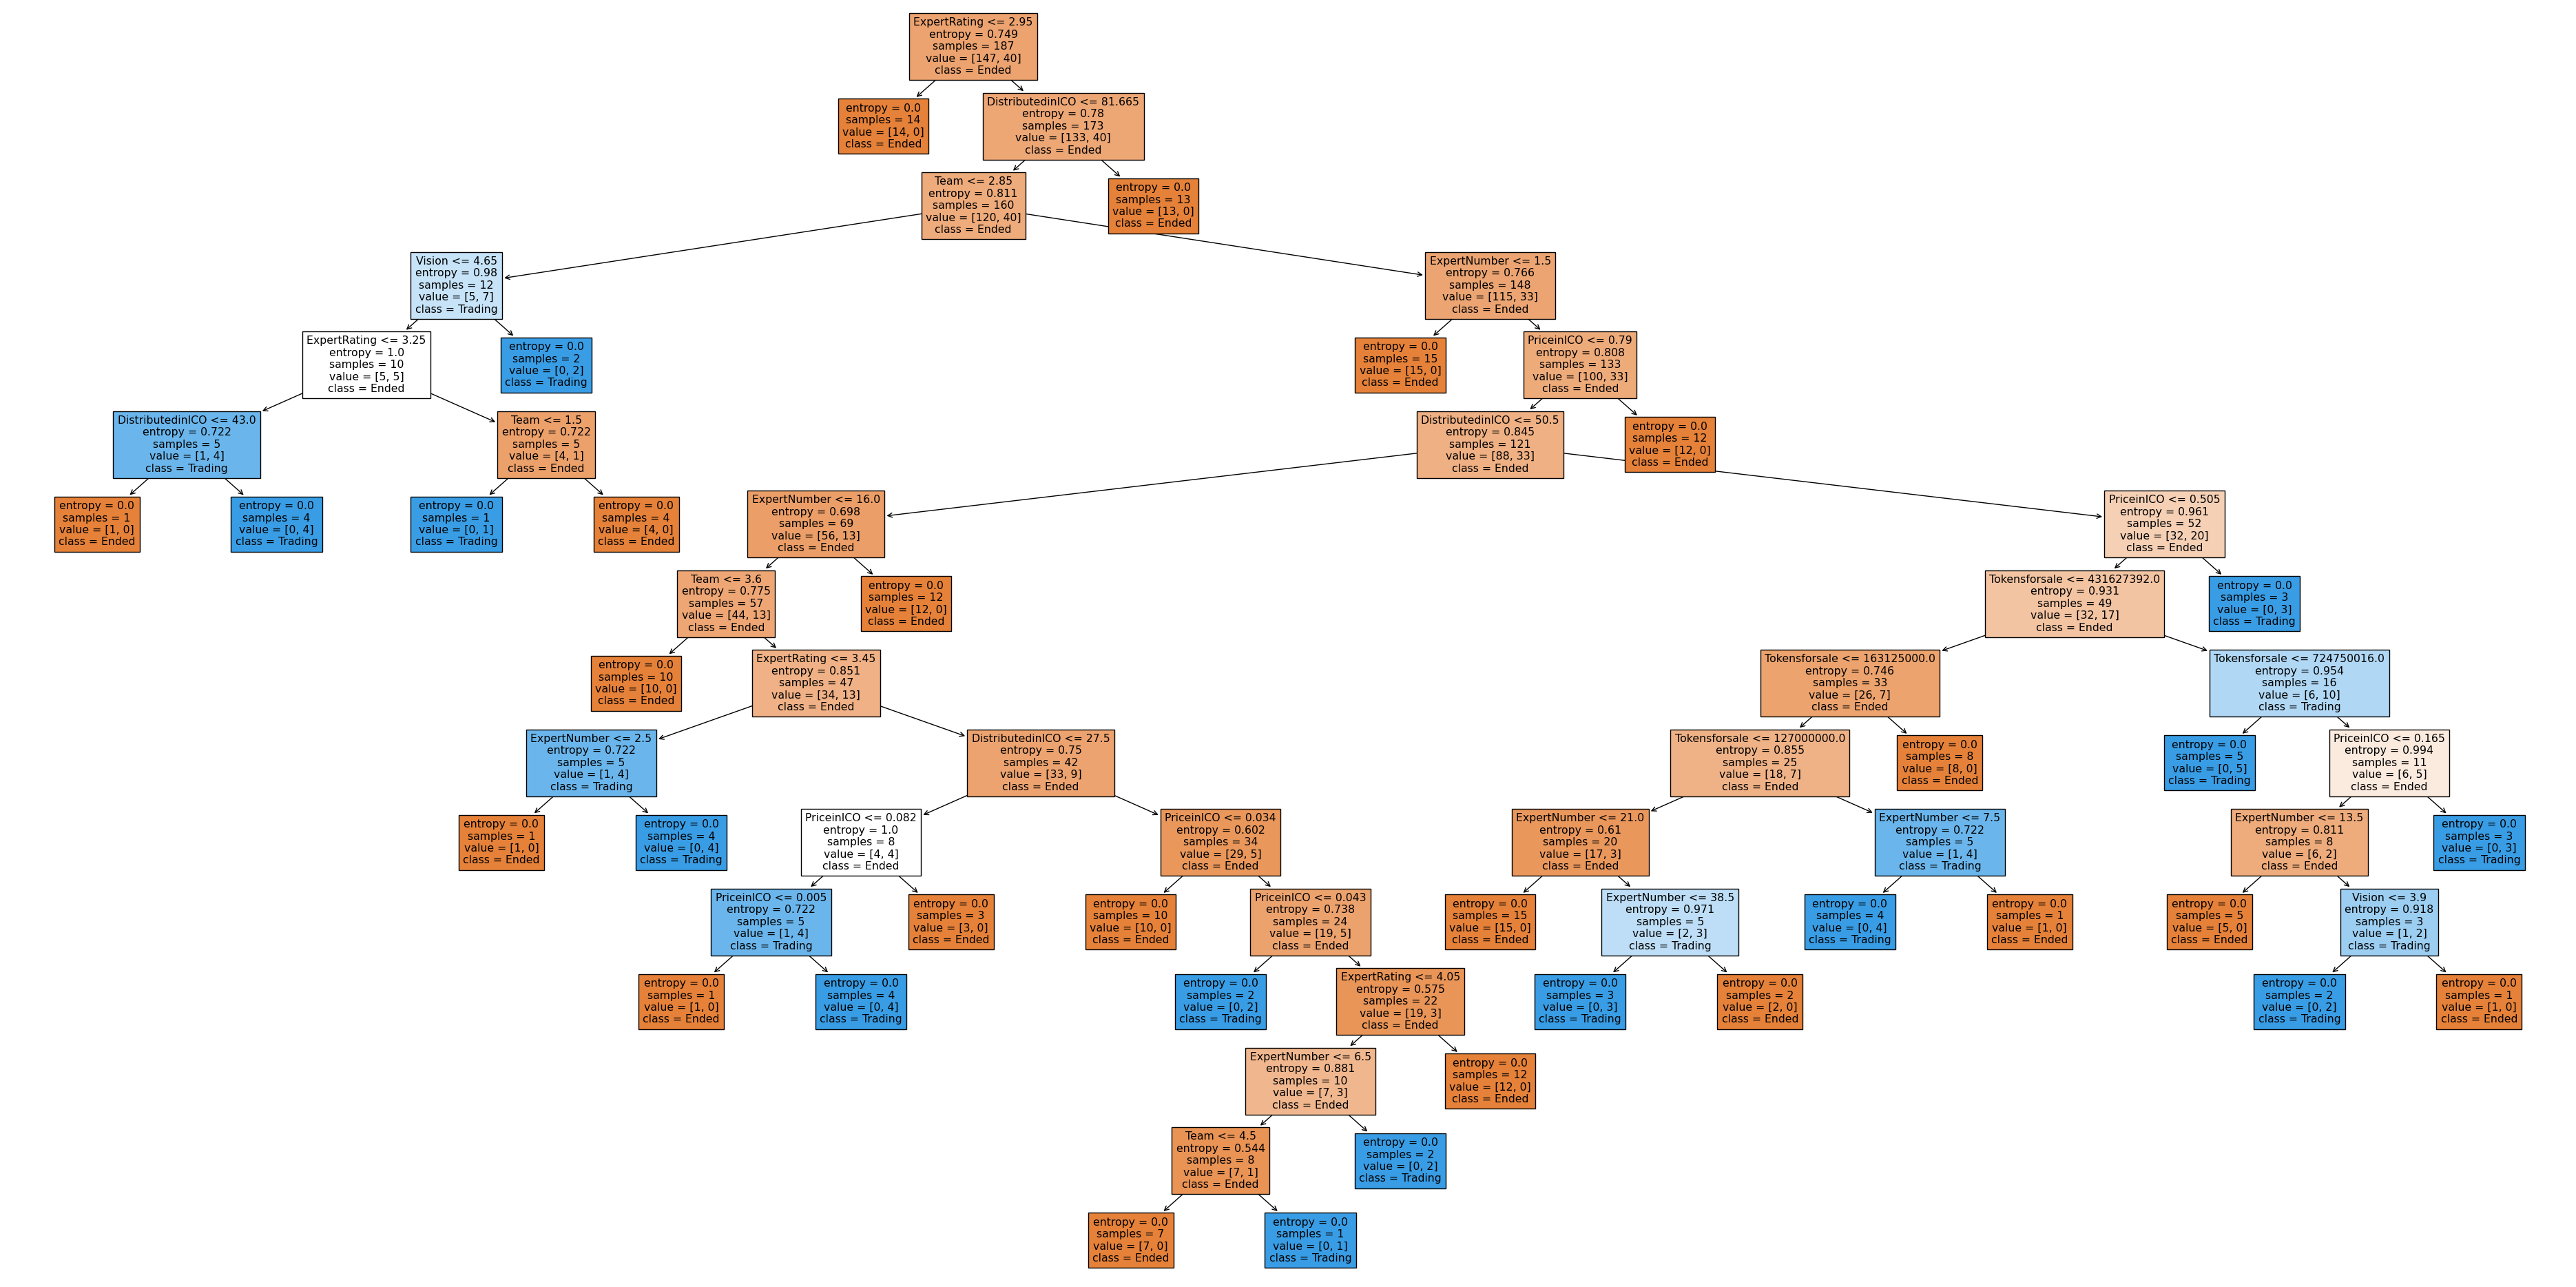

In [50]:
plt.figure(figsize=(48,24))
plot_tree(model, feature_names=X.columns, class_names=['Ended', 'Trading'], filled=True)
plt.show()

In [92]:
## Set constraints when creating the tree
pruned_tree = DecisionTreeClassifier(
    random_state=80,
    criterion='entropy',
    max_depth=6,                  # Limit the depth of the tree
    #min_samples_split=2,           # Min samples required to split a node
    #min_samples_leaf=2,           # Min samples required in a leaf node
    #max_leaf_nodes=20,            # Max number of leaf nodes
    #min_impurity_decrease=0.02     # Min impurity decrease required for splitting
)

pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=80)

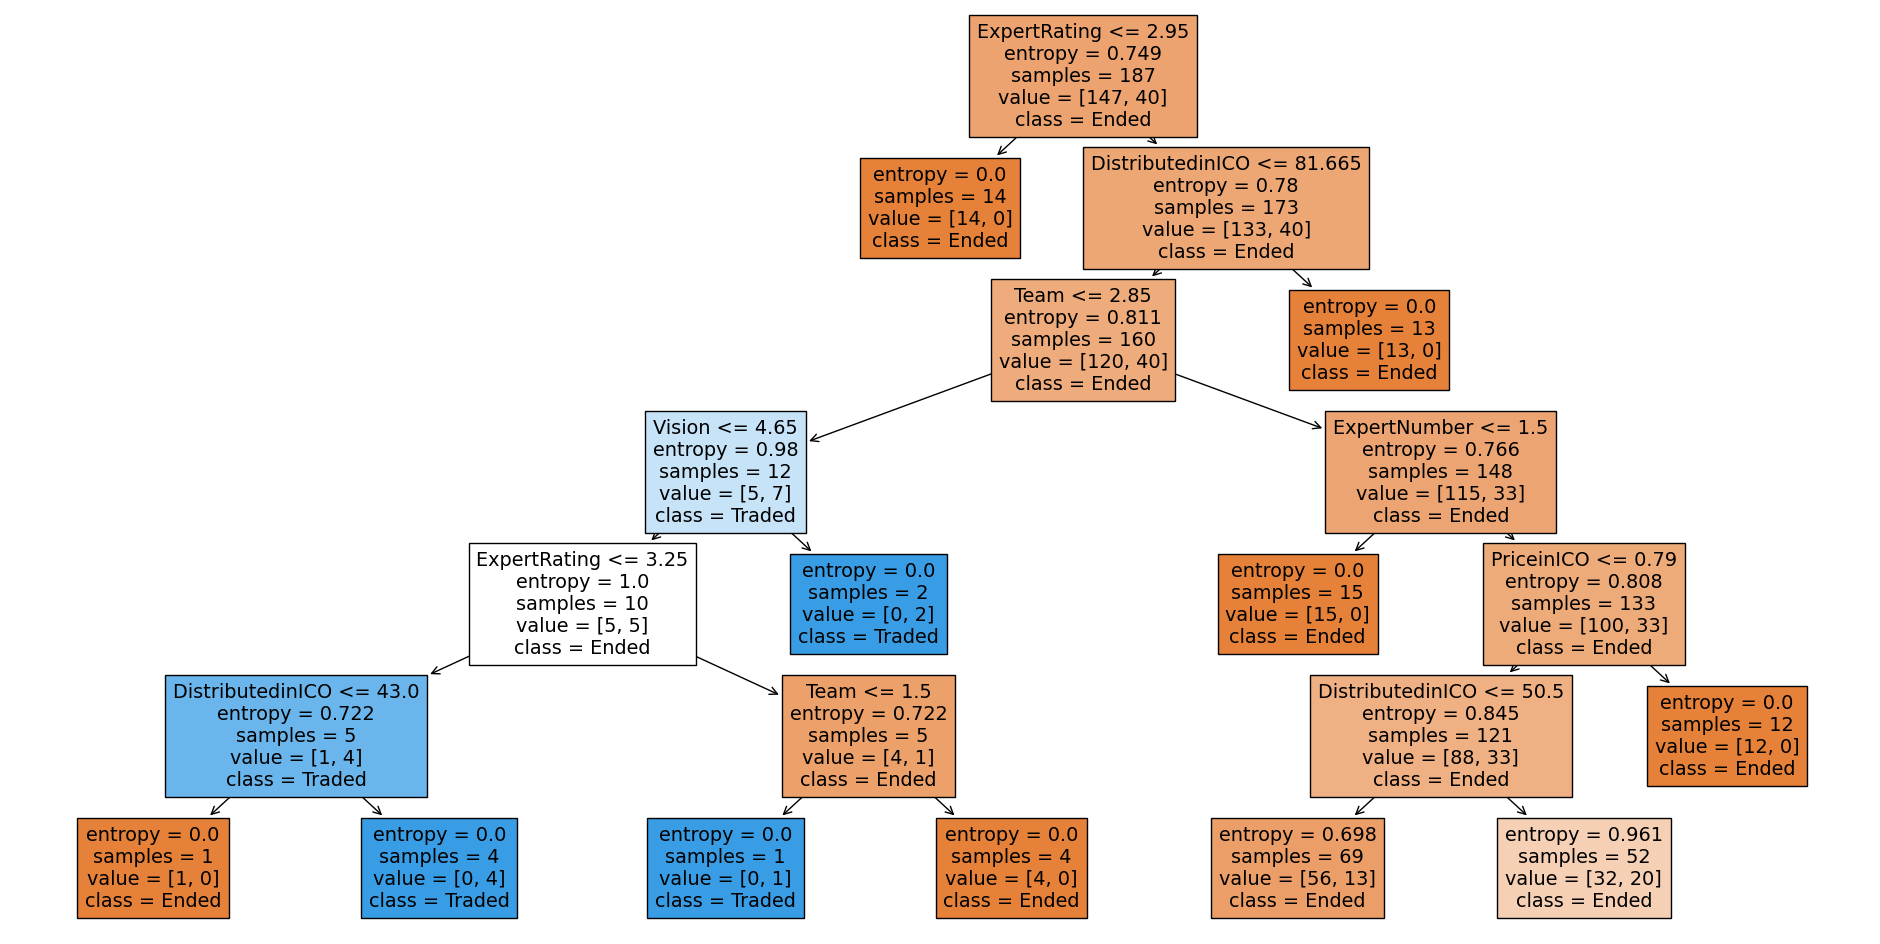

In [93]:
plt.figure(figsize=(24,12))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['Ended', 'Traded'], filled=True)
plt.show()

In [ ]:
#Print decision rules

print("The decision rules that determin what project that will be successful are:")
print("1. The vision should be less then or equaled to 4.65")
print("2. The expert rating should be less then or equaled to 3.25")
print("3. The distribution in ICO should be less then or equaled to 43")


The decision rules that determin what project that will be successful are:
1. The vision should be less then or equaled to 4.65
2. The expert rating should be less then or equaled to 3.25
3. The distribution in ICO should be less then or equaled to 43


In [95]:
# Predictions on the test set
y_pred_1 = model.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_1)

0.723404255319149

In [96]:
# Predictions on the test set
y_pred_2 = pruned_tree.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_2)

0.8085106382978723

In [97]:
pd.crosstab(y_test, y_pred_1) # rows are actual, columns are predicted

col_0,Ended,Trading
Status,,
Ended,32,6
Trading,7,2


In [98]:
pd.crosstab(y_test, y_pred_2) # rows are actual, columns are predicted

col_0,Ended,Trading
Status,,
Ended,37,1
Trading,8,1
